In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.pipeline import  Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the train dataset 

train_df = pd.read_csv(r'/Users/sot/Downloads/archive (4)/train.txt', header = None)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train_df.head(10)

,0
0,i didnt feel humiliated;sadness
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wro...
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy;anger
5,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...
9,i feel romantic too;love


In [5]:
# Importing the test dataset

test_df = pd.read_csv(r'/Users/sot/Downloads/archive (4)/test.txt', header = None)

In [6]:
test_df.head()

,0
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty;sadness
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this on...


In [7]:
#Importing validation dataset

val_df = pd.read_csv(r'/Users/sot/Downloads/archive (4)/val.txt', header = None)

In [8]:
val_df.head()

,0
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant;love
3,i am just feeling cranky and blue;anger
4,i can have for a treat or if i am feeling fest...


### SPLITTING DATASET TO GET TARGET AND EDA

In [9]:
train = pd.read_csv(r'/Users/sot/Downloads/archive (4)/train.txt', sep=';', header=None,
                            names=['text', 'target'])

In [10]:
train.head()

,text,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<Axes: xlabel='target', ylabel='count'>

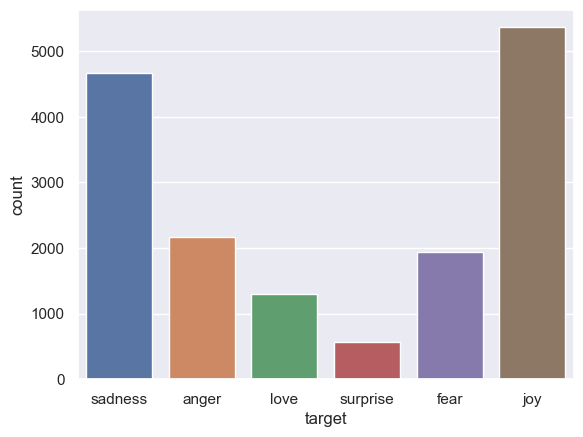

In [11]:
sns.countplot(data = train, x='target') 

In [12]:
 train['target'].value_counts()

target
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [13]:
val = pd.read_csv(r'/Users/sot/Downloads/archive (4)/val.txt', sep=';', header=None,
                            names=['text', 'target'])

In [14]:
val['target'].value_counts()

target
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

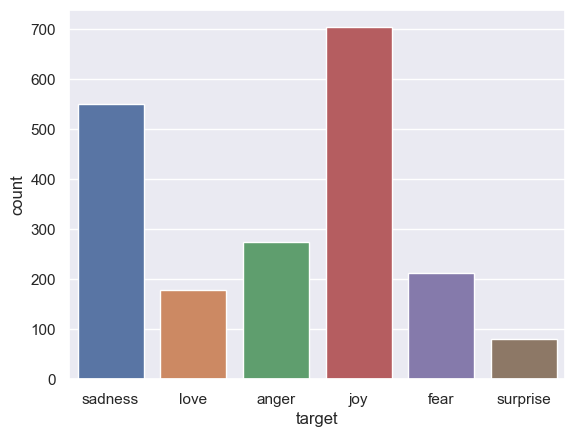

In [15]:
sns.countplot(data = val, x='target')

In [16]:
test = pd.read_csv(r'/Users/sot/Downloads/archive (4)/test.txt', sep=';', header=None,
                            names=['text', 'target'])

In [17]:
test['target'].value_counts()

target
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

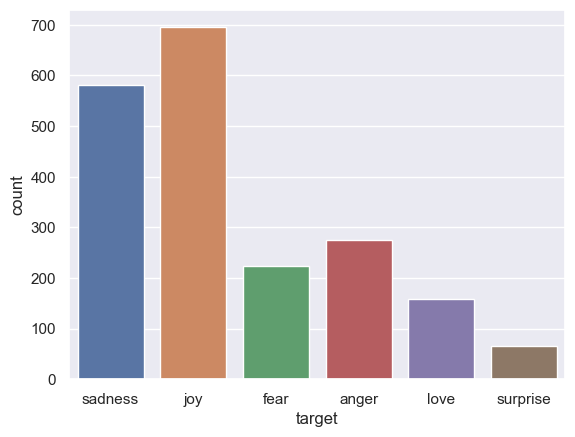

In [18]:
sns.countplot(data = test, x='target')

#### looking at the EDA of each of dataset, it's apparent that love and surprise emotions have  low representation  and JOY has very high data representation

## DATA CLEANING

In [19]:
# CHECK FOR SPACES IN THE DATASET

In [20]:
train['text'].str.isspace().sum()

0

In [21]:
val['text'].str.isspace().sum()

0

In [22]:
test['text'].str.isspace().sum()

0

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   target  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [24]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   target  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   target  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [26]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [27]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/sot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Preprocesssing and creating my bag of words to determine the best figure for max_features before creating custom text processor and Pipeline that would get hold my custom textPrecessor, vectorizer, and model. 

In [28]:

corpus = []
stemmer = PorterStemmer()
all_stopwords = stopwords.words('english')

for i in range(0, 16000):
    text = re.sub('[^a-zA-Z]', ' ', train['text'][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if not word in set(all_stopwords)]
    text = ' '.join(text)
    corpus.append(text)
   
    cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

len(X[0])

10359

### To avoid high dimensionality and equally loss of releveant words i would set max_feature = 10000

#### A text processing class that will take any text, remove any non-alphabet character, turn  all text to lower case and split the text when set to true

In [29]:
class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower=False, stem=False):
        self.lower = lower
        self.stem = stem
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def text_processing(text):
            processed_text = re.sub('[^a-zA-Z]', ' ', text)
            if self.lower:
                processed_text = processed_text.lower()
            processed_text = processed_text.split()
            if self.stem:
                ps = PorterStemmer()
                processed_text = [ps.stem(word) for word in processed_text if word not in set(stopwords.words('english'))]
            processed_text = ' '.join(processed_text)
            return processed_text
        
        return [text_processing(text) for text in X]

## creating the pipeline

## Building and evaluating different model performance 

##- RANDOM FOREST CLASSIFIER

In [30]:

from sklearn.ensemble import RandomForestClassifier


text_processor = TextProcessor(lower=True, stem=True)
vectorizer = CountVectorizer(max_features=10000)
rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, verbose=1)

pipeline_rfc = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer()),  
    ("model", rfc) 
])

pipeline_rfc.fit(train['text'], train['target'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


Pipeline(steps=[('text_processing', TextProcessor(lower=True, stem=True)),
                ('vectorizer', CountVectorizer()),
                ('model',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42, verbose=1))])

## Predicting and evaluating the validation dataset

In [31]:
pred_rfc = pipeline_rfc.predict(val['text'])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [32]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(val['target'],pred_rfc))

              precision    recall  f1-score   support

       anger       0.80      0.90      0.85       275
        fear       0.79      0.80      0.80       212
         joy       0.90      0.86      0.88       704
        love       0.74      0.70      0.72       178
     sadness       0.90      0.88      0.89       550
    surprise       0.73      0.83      0.77        81

    accuracy                           0.85      2000
   macro avg       0.81      0.83      0.82      2000
weighted avg       0.85      0.85      0.85      2000



In [42]:
accuracy_score(val['target'],pred_rfc)

0.8505

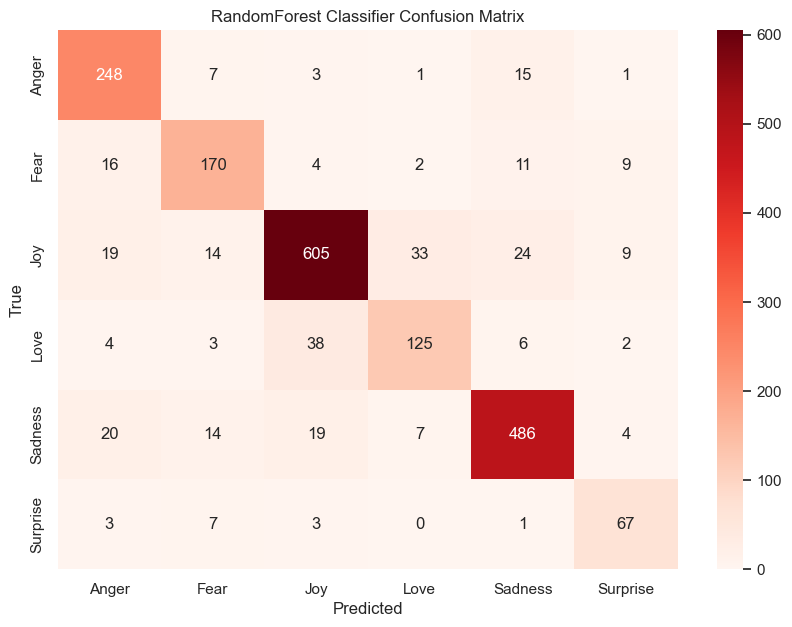

In [34]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val['target'], pred_rfc)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()


## Predicting and evaluating the test dataset

In [35]:
pred_rfc_test = pipeline_rfc.predict(test['text'])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [36]:
print(classification_report(test['target'],pred_rfc_test))

              precision    recall  f1-score   support

       anger       0.82      0.90      0.86       275
        fear       0.81      0.83      0.82       224
         joy       0.89      0.87      0.88       695
        love       0.67      0.64      0.65       159
     sadness       0.91      0.88      0.90       581
    surprise       0.54      0.64      0.58        66

    accuracy                           0.85      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.85      0.85      0.85      2000



In [109]:
rfc_acc = accuracy_score(test['target'],pred_rfc_test)

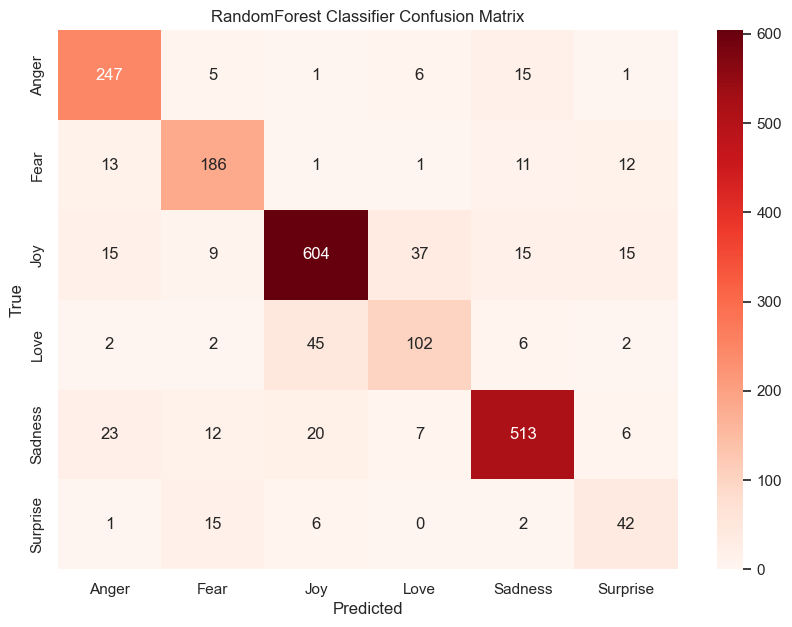

In [37]:


cm = confusion_matrix(test['target'], pred_rfc_test)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForest Classifier Confusion Matrix')
plt.show()

## 2.  GaussianNB classifier

In [51]:
## function to convert the sparse matrix from vectorization to a dense numpy array. GaussianNB accepts dense input

class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray()

In [52]:
from sklearn.naive_bayes import GaussianNB

text_processor = TextProcessor(lower=True, stem=True)
vectorizer = CountVectorizer(max_features=10000)

gnb = GaussianNB()

pipeline_gnb = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer()),
     ("to_dense", DenseTransformer()),
    ("model", gnb) 
])

pipeline_gnb.fit(train['text'], train['target'])

Pipeline(steps=[('text_processing', TextProcessor(lower=True, stem=True)),
                ('vectorizer', CountVectorizer()),
                ('to_dense', DenseTransformer()), ('model', GaussianNB())])

## Predicting and evaluating the validation dataset

In [53]:
pred_gnb = pipeline_gnb.predict(val['text'])

In [54]:
print(classification_report(val['target'],pred_gnb))

              precision    recall  f1-score   support

       anger       0.29      0.27      0.28       275
        fear       0.21      0.41      0.28       212
         joy       0.57      0.21      0.31       704
        love       0.19      0.47      0.27       178
     sadness       0.41      0.23      0.29       550
    surprise       0.11      0.43      0.17        81

    accuracy                           0.28      2000
   macro avg       0.30      0.34      0.27      2000
weighted avg       0.40      0.28      0.29      2000



In [55]:
accuracy_score(val['target'],pred_gnb)

0.2775

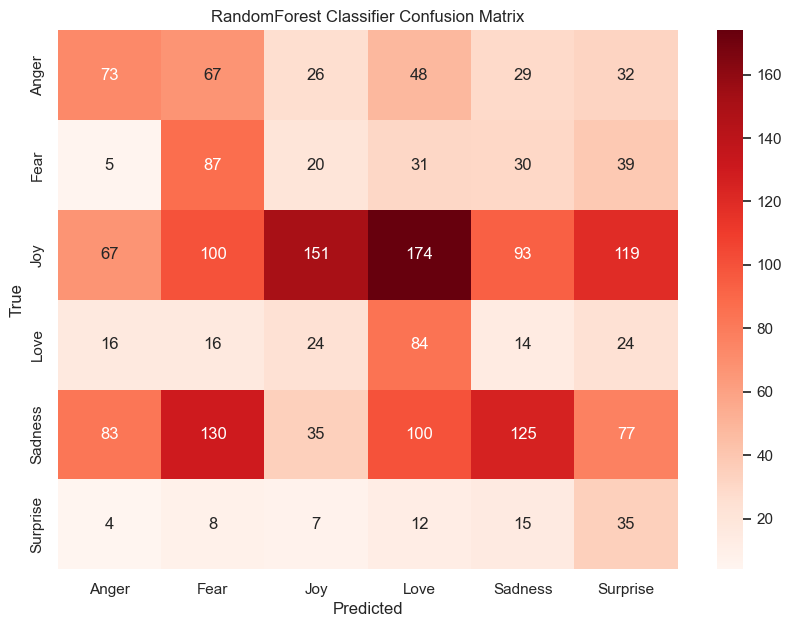

In [57]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val['target'], pred_gnb)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GaussianNB Classifier Confusion Matrix')
plt.show()



## Predicting and evaluating the test dataset 

In [59]:
pred_gnb_test = pipeline_gnb.predict(test['text'])

In [ ]:
print(classification_report(test['target'],pred_gnb_test))

In [110]:
nb_acc = accuracy_score(test['target'],pred_gnb_test)

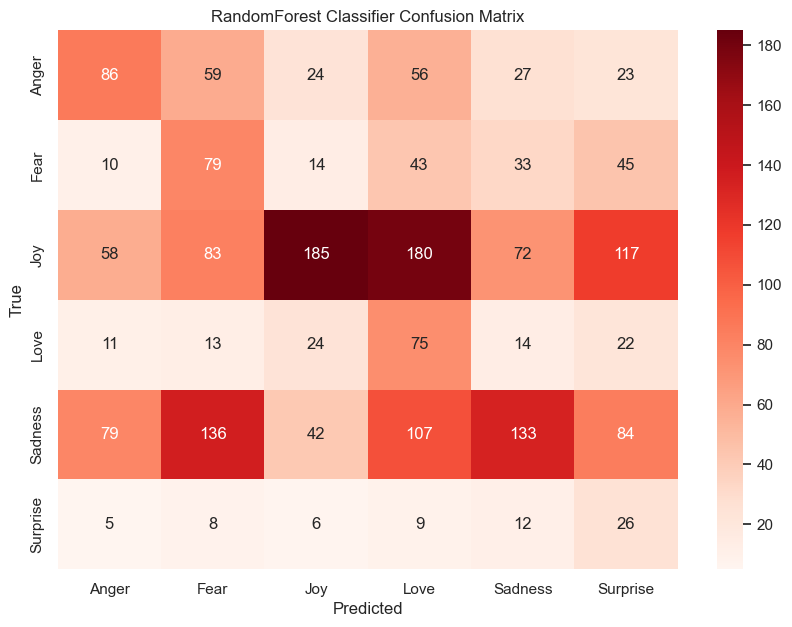

In [61]:
cm = confusion_matrix(test['target'], pred_gnb_test)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' GaussianNB Classifier Confusion Matrix')
plt.show()

## 3. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
text_processor = TextProcessor(lower=True, stem=True)

vectorizer = CountVectorizer(max_features=10000)

logistics = LogisticRegression(random_state=42, max_iter=1000)

logs_pipeline = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", CountVectorizer()),   
    ("classifier", logistics)  
])

logs_pipeline.fit(train['text'], train['target'])

Pipeline(steps=[('text_processing', TextProcessor(lower=True, stem=True)),
                ('vectorizer', CountVectorizer()),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## Predicting and evaluating the VALIDATION dataset 

In [81]:
pred_log = logs_pipeline.predict(val['text'])

In [82]:
print(classification_report(val['target'],pred_log))

              precision    recall  f1-score   support

       anger       0.84      0.84      0.84       275
        fear       0.81      0.81      0.81       212
         joy       0.87      0.88      0.88       704
        love       0.79      0.70      0.74       178
     sadness       0.89      0.91      0.90       550
    surprise       0.74      0.74      0.74        81

    accuracy                           0.85      2000
   macro avg       0.82      0.81      0.82      2000
weighted avg       0.85      0.85      0.85      2000



In [83]:
accuracy_score(val['target'],pred_log)

0.8545

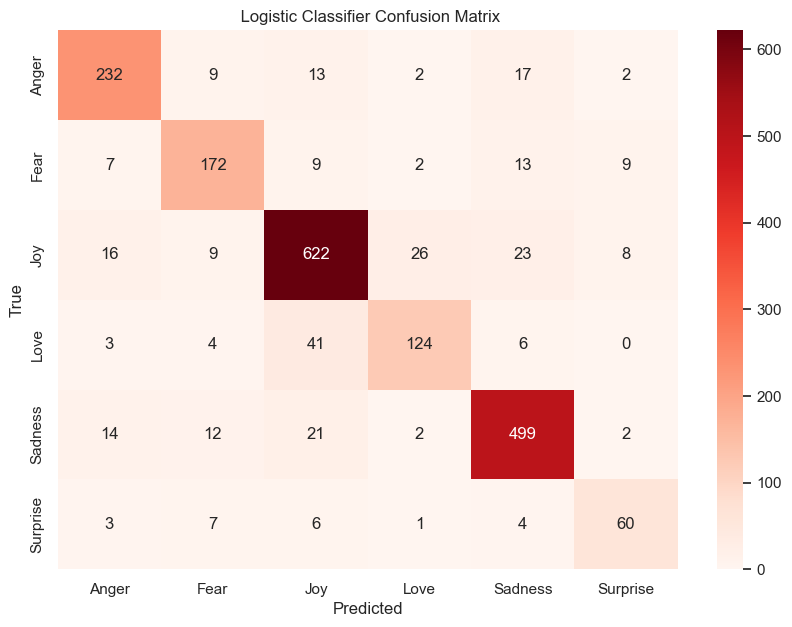

In [107]:
cm = confusion_matrix(val['target'], pred_log)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' Logistic Classifier Confusion Matrix')
plt.show()

## Predicting and evaluating the test dataset 

In [84]:
pred_log_test = logs_pipeline.predict(test['text'])

In [85]:
print(classification_report(test['target'],pred_log_test))

              precision    recall  f1-score   support

       anger       0.85      0.84      0.84       275
        fear       0.84      0.82      0.83       224
         joy       0.88      0.91      0.89       695
        love       0.73      0.66      0.69       159
     sadness       0.89      0.90      0.89       581
    surprise       0.64      0.70      0.67        66

    accuracy                           0.86      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.86      0.86      0.86      2000



In [108]:
log_acc = accuracy_score(test['target'],pred_log_test)

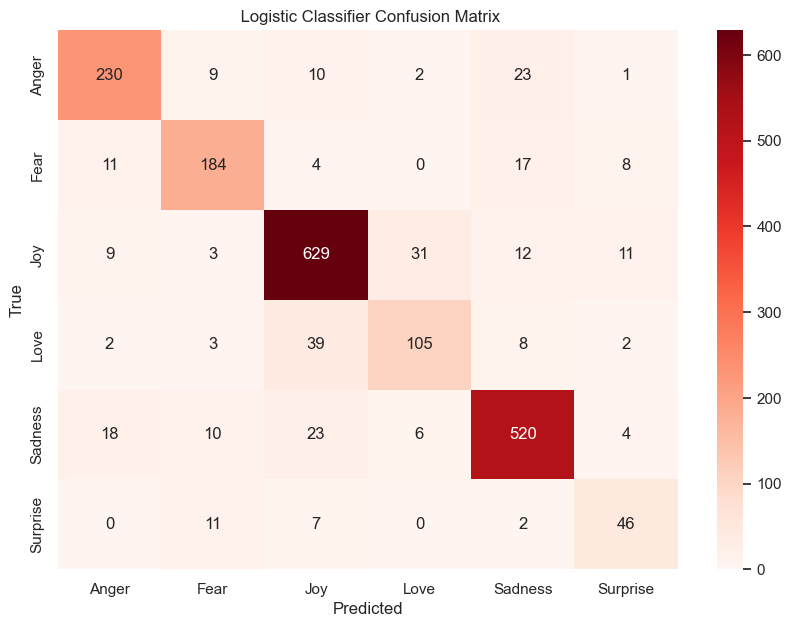

In [106]:
cm = confusion_matrix(test['target'], pred_log_test)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' Logistic Classifier Confusion Matrix')
plt.show()

# 4. Voting classifier

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
cl_3 = XGBClassifier()
cl_4 = LGBMClassifier()
cl_5 = CatBoostClassifier()
cl_6 = RandomForestClassifier()

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1),
                                          ('dt', clf2),
                                          ('xgb',cl_3),
                                          ('lgb',cl_4),
                                          ('cat',cl_5),
                                         ('rfc',cl_6)],voting='soft')

In [93]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [94]:


# Define a custom transformer to convert data to float
class ToFloatTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.astype(np.float64)

# Define classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
cl_3 = XGBClassifier()
cl_4 = LGBMClassifier()
cl_5 = CatBoostClassifier(verbose=0)  
cl_6 = RandomForestClassifier()

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', clf1),
                                          ('dt', clf2),
                                          ('xgb', cl_3),
                                          ('lgb', cl_4),
                                          ('cat', cl_5),
                                          ('rfc', cl_6)], voting='soft')


In [95]:
text_processor = TextProcessor(lower=True, stem=True)
vectorizer = CountVectorizer(max_features=10000)

voting_pipeline = Pipeline([
    ("text_processing", text_processor), 
    ("vectorizer", vectorizer),   
    ("to_float", ToFloatTransformer()),
    ("classifier", voting_clf)  
])

voting_pipeline.fit(train['text'], train['target'])



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 1149
[LightGBM] [Info] Start training from score -2.002944
[LightGBM] [Info] Start training from score -2.111448
[LightGBM] [Info] Start training from score -1.093252
[LightGBM] [Info] Start training from score -2.507152
[LightGBM] [Info] Start training from score -1.232287
[LightGBM] [Info] Start training from score -3.331205


Pipeline(steps=[('text_processing', TextProcessor(lower=True, stem=True)),
                ('vectorizer', CountVectorizer(max_features=10000)),
                ('to_float', ToFloatTransformer()),
                ('classifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42)),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                              ('lgb', LGBMClassifier()),
                                              ('cat',
                                               <catboost.core.CatBoostClassifier object at 0x2cd226b50>),
                                              ('rfc',
                                               RandomForestClassifier())],
                                  voting='soft'))])

### Predicting and evaluating validation dataset

In [90]:
pred_voting = voting_pipeline.predict(val['text'])

In [91]:
accuracy_score(val['target'],pred_voting)

0.874

In [96]:
print(classification_report(val['target'],pred_voting))

              precision    recall  f1-score   support

       anger       0.83      0.90      0.86       275
        fear       0.80      0.87      0.84       212
         joy       0.91      0.88      0.90       704
        love       0.82      0.74      0.78       178
     sadness       0.91      0.90      0.91       550
    surprise       0.78      0.85      0.81        81

    accuracy                           0.87      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.88      0.87      0.87      2000



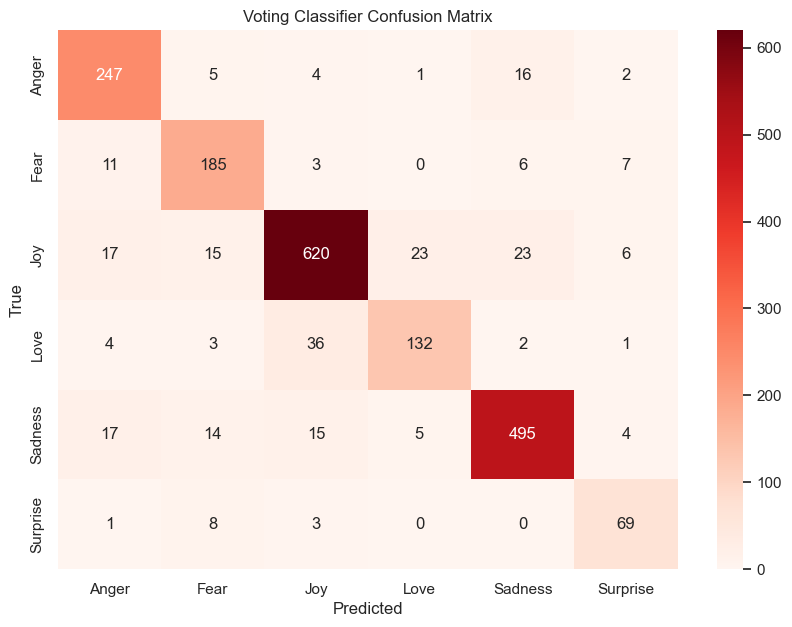

In [97]:

cm = confusion_matrix(val['target'], pred_voting)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

## Predicting and Evaluating test dataset

In [98]:
predd_voting = voting_pipeline.predict(test['text'])

In [111]:
voting_acc = accuracy_score(test['target'],predd_voting)

In [101]:
print(classification_report(test['target'],predd_voting))

              precision    recall  f1-score   support

       anger       0.84      0.88      0.86       275
        fear       0.81      0.84      0.83       224
         joy       0.90      0.89      0.89       695
        love       0.71      0.65      0.68       159
     sadness       0.92      0.90      0.91       581
    surprise       0.58      0.73      0.64        66

    accuracy                           0.86      2000
   macro avg       0.79      0.81      0.80      2000
weighted avg       0.86      0.86      0.86      2000



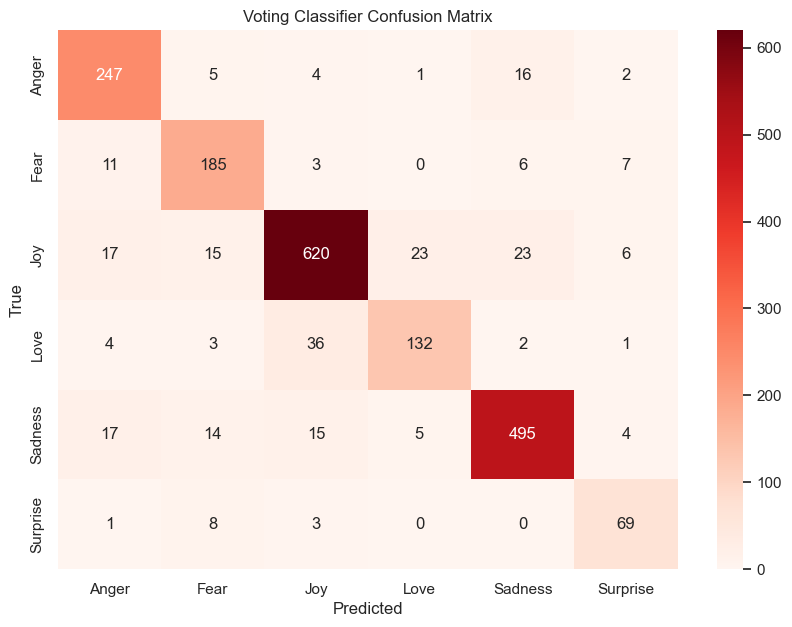

In [103]:
m = confusion_matrix(test['target'], predd_voting)

# Create heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], 
            yticklabels=['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Voting Classifier Confusion Matrix')
plt.show()

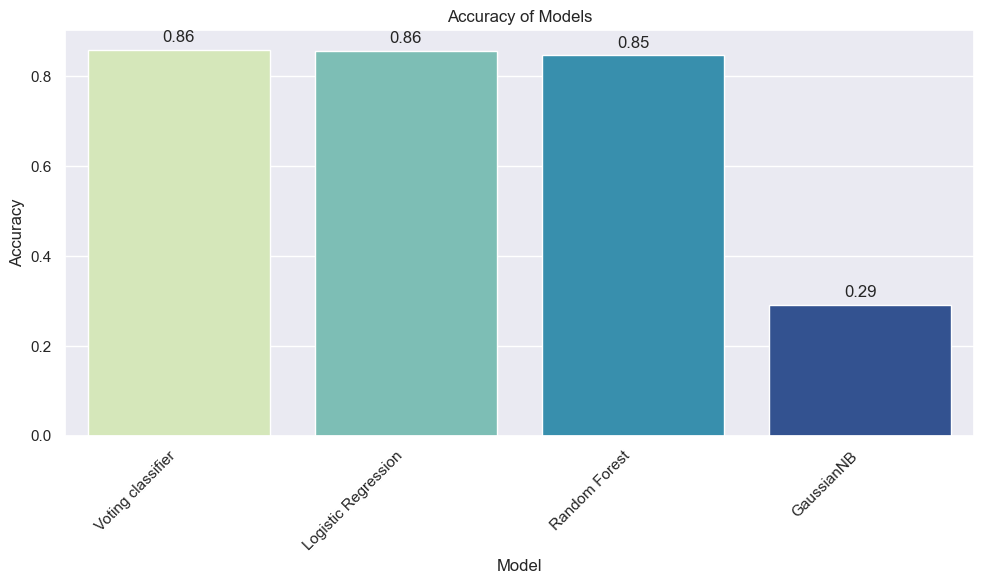

In [112]:
accuracies = {
    "Logistic Regression":log_acc ,
    "Random Forest": rfc_acc,
    "Voting classifier": voting_acc,
    "GaussianNB": nb_acc
 
}

sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
model_names = [model[0] for model in sorted_accuracies]
accuracy_values = [model[1] for model in sorted_accuracies]

# Create countplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracy_values, palette="YlGnBu")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracy_values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Model validation on my model voting classifier

In [113]:
custom_text = "I'm feeling happy and excited today"
predicted_emotion = voting_pipeline.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: joy


In [115]:
custom_text = "I'm realy don't even know why this is done for me!"
predicted_emotion = voting_pipeline.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: anger


In [116]:

custom_text = "I feel overwhelmed with sorrow"
predicted_emotion = voting_pipeline.predict([custom_text])
print("Predicted Emotion:", predicted_emotion[0])

Predicted Emotion: surprise


### model is generalizating so well. 

In [ ]:
## quite a jourrney. 